In [23]:
# 0) Chargement des bibliothèques + seed
# --------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Pour la régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Pour le réseau de neurones (Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Fixation du seed pour la reproductibilité
SEED = 123
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("Libraries loaded and random seed fixed.")


# 1) Lecture des données (depuis l'URL) et prétraitement
# ------------------------------------------------------

# URL des données
url = "https://turinici.com/wp-content/uploads/cours/common/close_cac40_historical.csv"

# Lecture du fichier CSV en ne chargeant que la colonne 'BNP.PA'
df_raw = pd.read_csv(url, sep=";", usecols=["Date", "BNP.PA"])

# Renommage des colonnes pour plus de clarté
df_raw.rename(columns={"BNP.PA": "Price"}, inplace=True)

# Conversion de la colonne 'Date' en format datetime (si ce n'est pas déjà le cas)
df_raw['Date'] = pd.to_datetime(df_raw['Date'])

# Définir la colonne 'Date' comme index
df_raw.set_index("Date", inplace=True)

# Affichage des premières lignes et dimensions
print("\nAperçu des premières lignes :")
print(df_raw.head())
print("\nDimensions initiales :", df_raw.shape)

# Retirer les lignes contenant des NaN dans la colonne 'Price'
df_raw.dropna(subset=["Price"], inplace=True)

# Tri par index (date) pour s'assurer de l'ordre chronologique
df_raw.sort_index(inplace=True)

# Vérification après nettoyage
print("\nAperçu après nettoyage :")
print(df_raw.head())
print("\nDimensions après nettoyage :", df_raw.shape)



Libraries loaded and random seed fixed.

Aperçu des premières lignes :
                Price
Date                 
2000-01-03  16.165972
2000-01-04  15.711578
2000-01-05  15.379528
2000-01-06  14.855226
2000-01-07  15.047465

Dimensions initiales : (8605, 1)

Aperçu après nettoyage :
               Price
Date                
1993-10-18  4.227787
1993-10-19  4.120383
1993-10-20  4.149676
1993-10-21  4.218023
1993-10-22  4.315662

Dimensions après nettoyage : (7339, 1)


In [24]:
df = df_raw.copy()


In [25]:
df['returns']= np.log(df.Price / df.Price.shift(1))
df['returns'].dropna(axis= 0, inplace=True)
windows = [5,25,75,150,255,3*255]
for w in windows:
    df[f'rolling_mean_{w}_days'] = df['returns'].rolling(w).mean()
    df[f'rolling_annualized_standard_dev{w}'] = df['returns'].rolling(w).std()*np.sqrt(252)
    

In [26]:
df.dropna(axis = 0, inplace = True )

<Axes: xlabel='Date'>

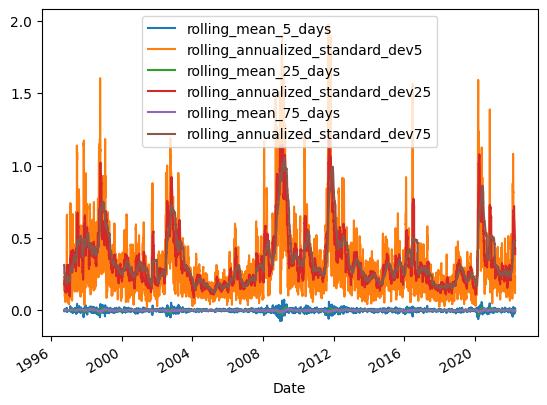

In [27]:
df_returns = df[df.columns[1:]]
df_returns.iloc[:,1:7].plot()

<Axes: xlabel='Date'>

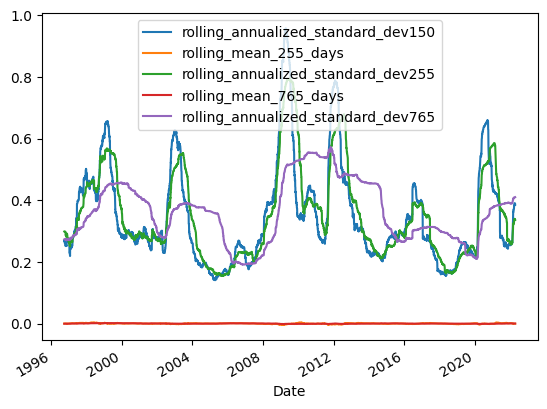

In [28]:
df_returns.iloc[:,8:].plot()

In [32]:
df_returns.index = pd.to_datetime(df_returns.index,format='%Y-%m-%d')

In [33]:
df_returns

,returns,rolling_mean_5_days,rolling_annualized_standard_dev5,rolling_mean_25_days,rolling_annualized_standard_dev25,rolling_mean_75_days,rolling_annualized_standard_dev75,rolling_mean_150_days,rolling_annualized_standard_dev150,rolling_mean_255_days,rolling_annualized_standard_dev255,rolling_mean_765_days,rolling_annualized_standard_dev765
Date,,,,,,,,,,,,,
1996-09-23,-0.006993,-5.536723e-03,0.143296,0.003519,0.232754,0.001615,0.314430,0.000738,0.270117,0.000394,0.299231,-0.000150,0.273507
1996-09-24,0.017391,3.053113e-17,0.206330,0.003156,0.225014,0.001663,0.314973,0.000786,0.270700,0.000502,0.299517,-0.000094,0.273296
1996-09-25,0.013699,4.819498e-03,0.200665,0.004154,0.222161,0.000508,0.257390,0.000720,0.269601,0.000489,0.299352,-0.000085,0.273380
1996-09-26,-0.003407,2.058424e-03,0.200419,0.002391,0.187451,0.000463,0.257489,0.000787,0.269028,0.000436,0.299224,-0.000111,0.273224
1996-09-27,0.003407,4.819498e-03,0.167645,0.001809,0.180324,0.000556,0.257436,0.000610,0.266366,0.000437,0.299224,-0.000137,0.272911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,0.011785,1.226637e-02,0.176588,0.000129,0.434540,-0.002712,0.483107,-0.000414,0.390296,0.000095,0.336845,0.000380,0.409853
2022-04-19,0.004836,7.788658e-03,0.119369,0.000579,0.434230,-0.002669,0.483240,-0.000305,0.390085,0.000127,0.336860,0.000383,0.409858
2022-04-20,0.029415,9.944537e-03,0.186650,0.000172,0.425752,-0.002371,0.486500,0.000196,0.387449,0.000136,0.337032,0.000400,0.410097
